In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'C:\Users\Usama\Desktop\fashion-mnist_train.csv', sep=',')
test = pd.read_csv(r'C:\Users\Usama\Desktop\fashion-mnist_test.csv', sep=',')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training = np.array(train, dtype='float32')
testing = np.array(test, dtype='float32')

In [5]:
training.shape

(60000, 785)

In [6]:
X_train = training[:, 1:]/255
Y_train = training[:, 0]

X_test = testing[:, 1:]/255
Y_test = testing[:, 0]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.2, random_state=12345)

In [9]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [10]:
import keras

Using TensorFlow backend.


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

In [30]:
model = Sequential()
model.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(output_dim = 32, activation = 'relu'))
model.add(Dense(output_dim = 10, activation = 'sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Usama\.conda\envs\fyp\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
C:\Users\Usama\.conda\envs\fyp\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
C:\Users\Usama\.conda\envs\fyp\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  import sys


In [31]:
epoch = 50
model.fit(X_train, Y_train, batch_size=512, epochs= 50, verbose=1, validation_data=(X_validate, Y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 109s 2ms/step - loss: 0.6074 - acc: 0.7743 - val_loss: 0.3519 - val_acc: 0.8763
Epoch 2/50
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3482 - acc: 0.8735 - val_loss: 0.3220 - val_acc: 0.8859
Epoch 3/50
48000/48000 [==============================] - 94s 2ms/step - loss: 0.3118 - acc: 0.8878 - val_loss: 0.2890 - val_acc: 0.8959
Epoch 4/50
48000/48000 [==============================] - 108s 2ms/step - loss: 0.2976 - acc: 0.8905 - val_loss: 0.2874 - val_acc: 0.8927
Epoch 5/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2810 - acc: 0.8965 - val_loss: 0.2825 - val_acc: 0.8942
Epoch 6/50
48000/48000 [==============================] - 113s 2ms/step - loss: 0.2640 - acc: 0.9023 - val_loss: 0.2529 - val_acc: 0.9077
Epoch 7/50
48000/48000 [==============================] - 111s 2ms/step - loss: 0.2535 - acc: 0.9056 - val_loss: 0.2632 - va

In [32]:
evaluation = model.evaluate(X_test, Y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 13s 1ms/step
Test Accuracy: 0.915


In [33]:
predicted = model.predict_classes(X_test)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

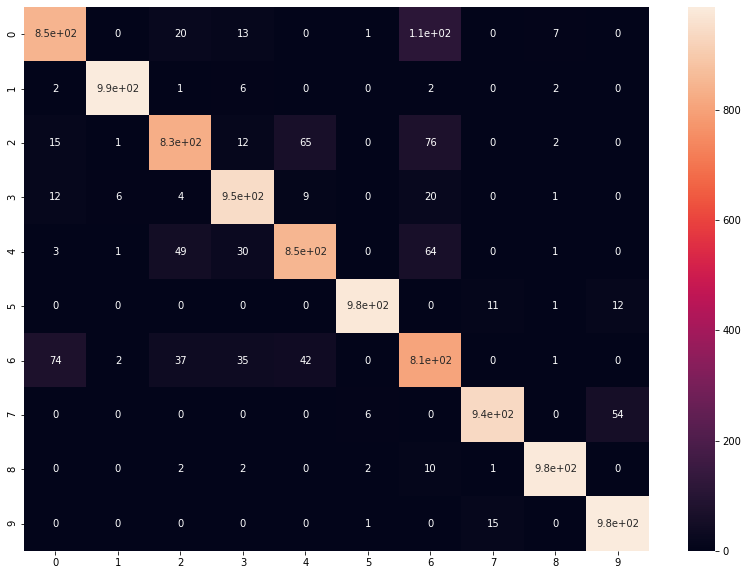

In [35]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test, predicted)
plt.figure(figsize=(14,10))
sns.heatmap(conf, annot=True)
